In [ ]:
#IMPORTS
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# files to be imported
# 1. service_merged.csv
# 2. testdata.csv

# Past 15 days data as on 20th Feb is used to train the dataset.

In [ ]:
df = pd.read_csv("service_merged.csv")

In [ ]:
df.head()

,Count,Status,Service,Message
0,≈4.09M,info,aapps-digital-service,Processed event [wildcard]*[/wildcard] next st...
1,≈4.04M,info,aapps-digital-service,Processing new CallbackEvent for state [[wildc...
2,≈1.17M,info,aapps-digital-service,'- Message sent to Digital API: [AutomatedApps...
3,≈1.15M,info,aapps-digital-service,'- Added message [E1:[wildcard]*[/wildcard]] t...
4,≈1.14M,info,aapps-digital-service,Received confirmation with dialogId: [[wildcar...


In [ ]:
def remove_strings(big_string, strings_to_remove):
    for string in strings_to_remove:
        big_string = big_string.replace(string, '')
    return big_string

In [ ]:
def clean(s):
    s = re.sub('\]|\[|\)|\(|\=|\,|\;', ' ', s)
    s = " ".join([word.lower() if word.isupper() else word for word in s.strip().split()])
    s = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', s))
    s = " ".join([word for word in s.split() if not bool(re.search(r'\d', word))])
    trantab = str.maketrans(dict.fromkeys(list(string.punctuation)))
    content = s.translate(trantab)
    s = " ".join([word.lower().strip() for word in content.strip().split()])
    strings_to_remove = ['wildcard', 'yyyy', 'mmdd', 'hhmmss', 'sss']  # These words create a sense for the incorrect predictions [wildcard, yyyy, mmdd, hhmmss, sss]
    result = remove_strings(s , strings_to_remove)

    return result

In [ ]:
df.shape

(5783, 4)

In [ ]:
pos_data=[]
neg_data=[]
for i in range(5783):
    if(df["Status"][i]=='error'):
        neg_data.append(df["Message"][i])
    else:
        pos_data.append(df["Message"][i])
print(len(pos_data))
print(len(neg_data))


5510
273


In [ ]:
data=[]
data.extend(neg_data)
pos_data = pos_data[:273]
data.extend(pos_data)
len(data)

546

In [ ]:
clean_data=[]
for val in data:
    val = clean(val)
    clean_data.append(val)
len(clean_data)

546

In [ ]:
# TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(clean_data)

# KMeans clustering provides insight if model differentiate between positive and negative
km = KMeans(n_clusters=2, n_init=3, random_state=0)

# Fit the model to the data
km.fit(X)
# Print the cluster labels
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
print(data[0])
labels = km.labels_
print(labels[0])

(Will not log errors for 5 minutes)
0


**Visualization of the Clusters**

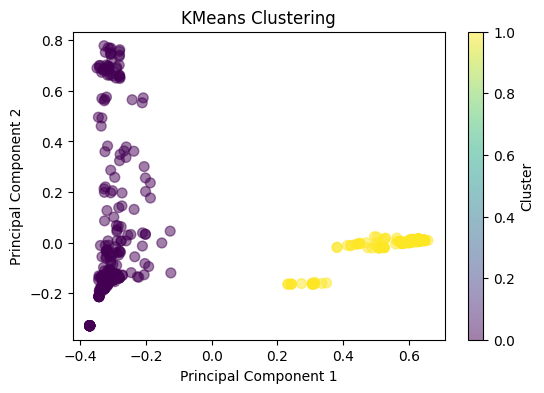

In [ ]:
# Reduce the dimensionality of the TF-IDF vectors to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

**Classifier : Support Vector Machine**

In [ ]:
# Add labels to the data
label_neg = [0] * len(neg_data)  # Assign label 0 to negatives
label_pos = [1] * len(pos_data)    # Assign label 1 to positives

X_data = neg_data + pos_data  # order is preserved first 37 neg and next 37 pos.
y_labels = label_neg + label_pos  # mapped to respective log in X_data

vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(X_data)

X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

# Evaluation of the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9636363636363636
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.98      0.94      0.96        50

    accuracy                           0.96       110
   macro avg       0.97      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110



**Classifier: RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Add labels to the data
label_neg = [0] * len(neg_data)  # Assign label 0 to negatives
label_pos = [1] * len(pos_data)    # Assign label 1 to positives

X_data = neg_data + pos_data  # order is preserved first 37 neg and next 37 pos.
y_labels = label_neg + label_pos  # mapped to respective log in X_data

vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(X_data)

X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

# Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

# Evaluation of the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.9727272727272728
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.94      0.97        50

    accuracy                           0.97       110
   macro avg       0.98      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



**Classifier: Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Add labels to the data
label_neg = [0] * len(neg_data)  # Assign label 0 to negatives
label_pos = [1] * len(pos_data)    # Assign label 1 to positives

X_data = neg_data + pos_data  # order is preserved first 37 neg and next 37 pos.
y_labels = label_neg + label_pos  # mapped to respective log in X_data

vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(X_data)

X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

# Decision Tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

# Evaluation of the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.9181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        60
           1       0.87      0.96      0.91        50

    accuracy                           0.92       110
   macro avg       0.92      0.92      0.92       110
weighted avg       0.92      0.92      0.92       110



Accuracy is 96.36% with SVM and 97.27% with RandomForestClassifier.

The model is trained on 546 samples only of which 273 are negative and 273 are positive. By increasing the training dataset more accuracy can be achieved.

**Performance analysis using Confusion Matrix**

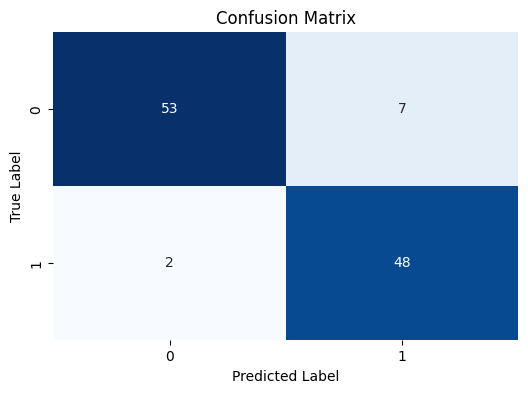

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Inference on the Unseen Data**

0 - Predicted as Negative

1 - Predicted as Positive

In [ ]:
stat = "got engagement by id, accountId = LKPZWU, engagementId = 00eed7ec-ea32-487c-bb8a-92825f908c7b"
stat = clean(stat)
# Transform the given statement using the same TF-IDF vectorizer
statement_vectorized = vectorizer.transform([stat])

# Use the trained classifier to predict the class
prediction = classifier.predict(statement_vectorized)

# Print the predicted class
print("Actual Class:"," 1 |", "Predicted Class:", prediction[0])

stat = "Caught Messaging exception for emailAddress [del***@ethereal.email] emailAccount [Delta O'Hara] accountId [IRGRHZ]"
stat = clean(stat)
statement_vectorized = vectorizer.transform([stat])
prediction = classifier.predict(statement_vectorized)
print("Actual Class:"," 0 |","Predicted Class:", prediction[0])

stat = "invokeCreateElement(): Failed to register Element, errorCode [ELEMENT_REGISTRATION_FAILED] errorMessage [Error in registering Element - Default Account Not Found]"
stat = clean(stat)
statement_vectorized = vectorizer.transform([stat])
prediction = classifier.predict(statement_vectorized)
print("Actual Class:"," 1 |","Predicted Class:", prediction[0])

stat = "error retrieving token from keycloak for tenant ungjyx"
stat = clean(stat)
statement_vectorized = vectorizer.transform([stat])
prediction = classifier.predict(statement_vectorized)
print("Actual Class:"," 0 |","Predicted Class:", prediction[0])



Actual Class:  1 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  1 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0


In [ ]:
# Testing the model on latest logs
df = pd.read_csv("testdata.csv")

In [ ]:
df.head()

,Count,Status,Service,Message
0,≈266K,error,analytics-passthrough-proc,handleSummarizationEvent(): Failed to process ...
1,≈18.6K,error,analytics-database-schema-manager,DatabaseController.syncJournalTablesFromDb: An...
2,≈17.9K,error,analytics-database-schema-manager,DatabaseController.syncITDTablesFromDb: An SQL...
3,≈17.5K,error,analytics-passthrough-proc,processEvent(): Processing of events [wildcard...
4,≈11.7K,error,analytics-cumulative-proc,doProcess(): Processing of events [wildcard]*[...


In [ ]:
cl_msg=[]
for i in df["Message"]:
    val = clean(i)
    cl_msg.append(val)



In [ ]:
#Checking only the negative logs
for i in cl_msg:
    statement_vectorized = vectorizer.transform([i])
    prediction = classifier.predict(statement_vectorized)
    print("Actual Class:"," 0 |","Predicted Class:", prediction[0])

Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class:  0 | Predicted Class: 0
Actual Class

These words create a sense for the incorrect predictions [wildcard, yyyy, mmdd, hhmmss, sss]

In [ ]:
# Checking only the positive logs

